# Purpose 
Import of DWT data with two visualization examples: 1) SCL extent has flexible code for viewing time series maps; 2) Goodell Creek extent reads and writes netcdf files. This notebook reads in the depth to water table DHSVM as an example and saves is as a netCDF. This netCDF is then read as an xarray example (you can use the Goodell Creek data later when you have it).

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from rasterio.warp import transform
import pandas as pd
import xarray as xr
import seaborn as sns

Get DHSVM water table data

In [98]:
#use the DHSVM depth to water table data as an example
DHSVM_file_historic = 'Map.Soil.TableDepth.asc.historic'

provide path to values and load example 

In [99]:
path_DHSVM = '/Users/carina/Desktop/data/Water_table_skagit/' + DHSVM_file_historic

values = np.loadtxt(path_DHSVM)


In [100]:
dates_historic = 'export_historic_dates'
path_dates = '/Users/carina/Desktop/data/Water_table_skagit/dates_max_sat_sauk_old_files /' + dates_historic

dates = pd.read_csv(path_dates, sep=" ", header=None)

dates.columns = ["Map", "txt", "number", "date"] 
#dates.columns = ["Index","Map", "txt", "number", "date"] #this works with the new format
dates['date']


0     05/31/1969-00
1     06/10/1970-21
2     06/25/1971-21
3     06/11/1972-12
4     06/25/1973-21
5     06/19/1974-15
6     06/15/1975-15
7     12/04/1975-21
8     06/08/1977-18
9     12/15/1977-18
10    06/05/1979-21
11    12/21/1979-00
12    06/22/1981-06
13    06/20/1982-15
14    07/15/1983-06
15    06/30/1984-18
16    06/08/1985-15
17    11/06/1985-21
18    05/14/1987-21
19    05/29/1988-18
20    06/14/1989-15
21    12/08/1989-21
22    11/25/1990-15
23    12/09/1991-21
24    06/01/1993-21
25    05/29/1994-21
26    06/06/1995-15
27    12/01/1995-18
28    07/10/1997-15
29    05/27/1998-18
30    06/25/1999-18
31    06/14/2000-15
32    06/12/2001-21
33    06/06/2002-18
34    06/10/2003-15
35    10/23/2003-00
36    05/20/2005-21
37    06/08/2006-15
38    11/16/2006-21
39    06/05/2008-18
40    06/02/2009-15
41    06/10/2010-15
42    06/15/2011-15
43    11/28/2011-21
Name: date, dtype: object

In [103]:
# Read the data 
# DHSVM domain 
url_dem = "/Users/carina/Desktop/code/SkagitLandslideHazards/demsrtm150f1.tif"
da = xr.open_rasterio(url_dem)

In [104]:
#get number of days
num = dates['date'].size
num

44

Simple visualization of the water table data as a numpy array

In [105]:
#get size of y
temp_y = da.y.values
size_y = temp_y.size

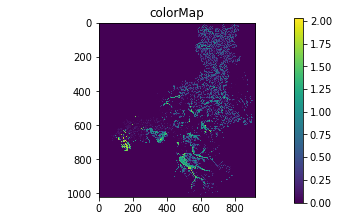

In [106]:
#visualize first day in the dataset
#no_time = values.shape[0]/1020

one_image = values[:size_y]
#second_image = values[1020:2040]

fig = plt.figure(figsize=(6, 3.2))

#plot one image to check 

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(one_image)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [107]:
#split the big concatenated depth to water table data into map/day
list_arrays = np.vsplit(values, num)

all_arrays =  np.asarray(list_arrays)

In [108]:
#create an xarray dataset conatining depth to water table

ds_wt = xr.Dataset(data_vars = {'wt': (('time', 'y', 'x'), all_arrays)})

In [109]:
#assign coordinates and plot again 
ds_wt['time'] = dates["date"].tolist()
ds_wt['y'] = da.y
ds_wt['x'] = da.x
#ds_wt = ds_wt.set_coords(['time','y', 'x'])


Now we have the DHSVM data in the xarray format with geographic coordinates. Let's plot the first image again.

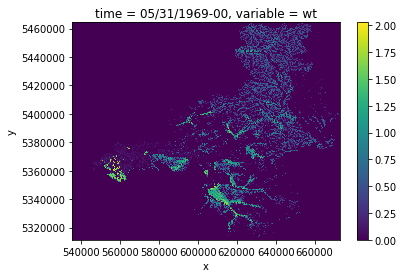

In [110]:
ds_wt.isel(time=[0]).to_array().plot() 

Visualize a time series of water table data, for exmap

In [111]:
one_location1 = ds_wt.sel(x = 620000, y = 5400000, method = 'nearest')

#ta_CBR = ta.sel(lat=-35.28, lon=149.13, method='nearest')
#ta_CBR.sel(plev=85000).plot()

Plot the time series

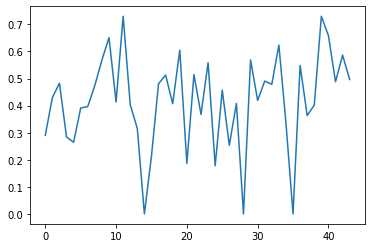

In [112]:
p = one_location1.wt.values

plt.plot(p)

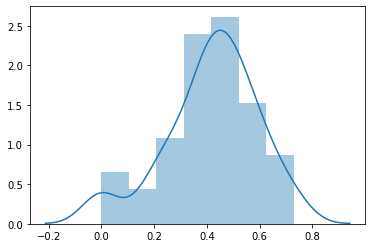

In [113]:
#sns.distplot(p);
sns.distplot(p);


Save dataset as a netCDF

In [114]:
ds_wt.to_netcdf('DHSVM_historic_water_table.nc')

load as netcdf

In [115]:
ds_disk = xr.open_dataset('DHSVM_historic_water_table.nc')

In [116]:
ds_disk

<xarray.Dataset>
Dimensions:  (time: 44, x: 916, y: 1020)
Coordinates:
  * x        (x) float64 5.357e+05 5.359e+05 5.36e+05 5.362e+05 5.363e+05 ...
  * y        (y) float64 5.464e+06 5.464e+06 5.464e+06 5.464e+06 5.464e+06 ...
  * time     (time) object '05/31/1969-00' '06/10/1970-21' '06/25/1971-21' ...
Data variables:
    wt       (time, y, x) float64 ...